In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
home_dir = '/content/drive/MyDrive/Colab Notebooks/transient_detection/'

In [6]:
df_stainfo = pd.read_table(home_dir+'stations.txt', sep=' ', index_col=False, names=['lon','lat','x1','x2','x3','x4','x5','name','x6','x7'], comment='#')
df_stainfo.head()

,lon,lat,x1,x2,x3,x4,x5,name,x6,x7
0,-123.487471,48.389781,-0.0077,-0.0078,0.0001,0.0001,0.0,albh,0.0005,0.0002
1,-122.141860,48.174067,-0.0100,-0.0089,0.0002,0.0001,0.0,arli,-0.0040,0.0007
2,-125.135105,48.835329,-0.0039,-0.0061,0.0001,0.0001,0.0,bamf,0.0022,0.0004
3,-126.842643,50.544281,-0.0115,-0.0094,0.0001,0.0001,0.0,bcov,0.0022,0.0003
4,-124.563346,42.836099,-0.0064,0.0014,0.0001,0.0001,0.0,cabl,0.0003,0.0002


In [7]:
def read_timeseries(sta_name):
  file_path = home_dir+'raw_data/'+sta_name+'FilterResid.neu'
  col_names = ['t','yr','doy','n','e','u','n_sig','e_sig','u_sig']
  df_timeseries = pd.read_table(file_path, sep='\s+', float_precision='round_trip',comment='#',names=col_names)
  return df_timeseries

In [8]:
t = np.array([])

for sta_name in df_stainfo['name']:
  df_timeseries = read_timeseries(sta_name)
  t = np.append(t, df_timeseries['t'].values)

t = np.unique(t)
t = t[np.logical_and(t>=2005, t<2016)]
n_t = len(t)

In [12]:
n_sta = df_stainfo.shape[0]
disp_n = np.nan*np.zeros((n_sta, n_t))
disp_e = np.nan*np.zeros((n_sta, n_t))
disp_u = np.nan*np.zeros((n_sta, n_t))

for i, sta_name in enumerate(df_stainfo['name']):
  df_timeseries = read_timeseries(sta_name)

  _, index1, index2 = np.intersect1d(t, df_timeseries['t'], return_indices=True, assume_unique=True)

  disp_n[i, index1] = df_timeseries['n'][index2]
  disp_e[i, index1] = df_timeseries['e'][index2]
  disp_u[i, index1] = df_timeseries['u'][index2]

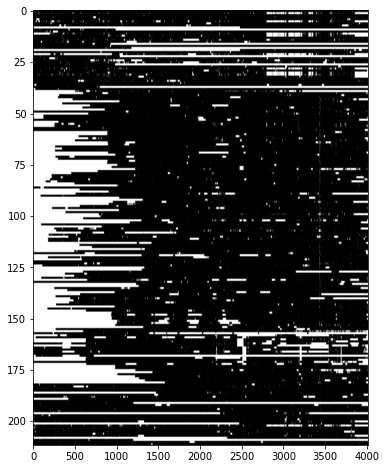

In [15]:
plt.figure(figsize=(6,8))
plt.imshow(np.int32(np.isnan(disp_n)),aspect='auto',cmap=plt.cm.gray)
plt.show()

In [17]:
def read_rsi_result(sta_name):
  
  file_path = home_dir+'rsi_rawresults/' + sta_name + '.txt'
  col_names = ['t','yr','doy','n','e','u','rsi_n','rsi_e','rsi_u','prob_n','prob_e','prob_u','lat','lon']
  df_rsi = pd.read_table(file_path, sep='\s+', float_precision='round_trip', names=col_names)

  #index = np.in1d(df_neu['t'], df_rsi['t'])
  #pd.concat([df_neu.loc[index].reset_index(drop=True), df_rsi.drop(columns=['t','yr','doy','n','e','u'])], axis=1)
  # pd.merge(df_epoch, df_rsi, how='left', on='t')

  return df_rsi

In [21]:
sta_name = 'albh'
df_rsi = read_rsi_result(sta_name)
#df_rsi.head()

df_timeseries = read_timeseries(sta_name)
#df_rsi.head()

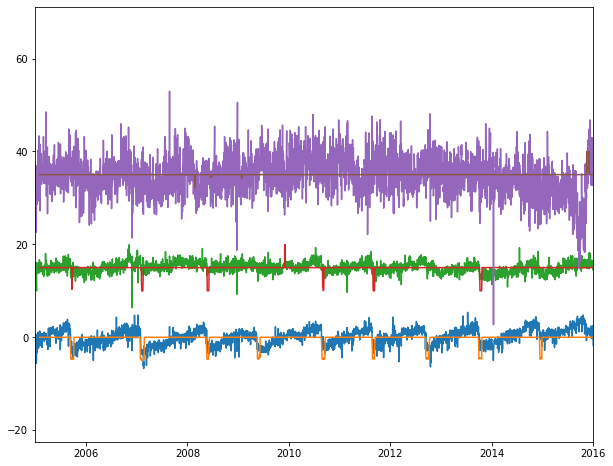

In [23]:
plt.figure(figsize=(10,8))
plt.plot(df_timeseries['t'], df_timeseries['e'])
plt.plot(df_rsi['t'], 5*df_rsi['prob_e'])

plt.plot(df_timeseries['t'], df_timeseries['n'] + 15)
plt.plot(df_rsi['t'], 5*df_rsi['prob_n'] + 15)

plt.plot(df_timeseries['t'], df_timeseries['u'] + 35)
plt.plot(df_rsi['t'], 5*df_rsi['prob_u'] + 35)

plt.xlim(2005, 2016)
plt.show()

In [20]:
prob_n = np.nan*np.zeros((n_sta, n_t))
prob_e = np.nan*np.zeros((n_sta, n_t))
prob_u = np.nan*np.zeros((n_sta, n_t))

for i, sta_name in enumerate(df_stainfo['name']):
  df_rsi = read_rsi_result(sta_name)

  _, index1, index2 = np.intersect1d(t, df_rsi['t'], return_indices=True, assume_unique=True)

  prob_n[i, index1] = df_rsi['prob_n'][index2]
  prob_e[i, index1] = df_rsi['prob_e'][index2]
  prob_u[i, index1] = df_rsi['prob_u'][index2]


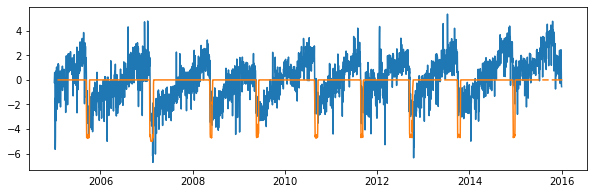

In [31]:
sta_index = 0
plt.figure(figsize=(10,3))
plt.plot(t, disp_e[sta_index,:])
plt.plot(t, 5*prob_e[sta_index,:])
plt.show()

In [32]:
with open(home_dir+'vectorized_data.npy', 'wb') as fid:
    np.save(fid, df_stainfo['name'].values)
    np.save(fid, df_stainfo['lat'].values)
    np.save(fid, df_stainfo['lon'].values)
    np.save(fid, t)
    np.save(fid, disp_n)
    np.save(fid, disp_e)
    np.save(fid, disp_u)
    np.save(fid, prob_n)
    np.save(fid, prob_e)
    np.save(fid, prob_u)

In [34]:
'''
with open(home_dir+'vectorized_data.npy', 'rb') as fid:
    staname_vec = np.load(fid)
    stalat_vec = np.load(fid)
    stalon_vec = np.load(fid)
    t_vec = np.load(fid)
    disp_n_mat = np.load(fid)
    disp_e_mat = np.load(fid)
    disp_u_mat = np.load(fid)
    prob_n_mat = np.load(fid)
    prob_e_mat = np.load(fid)
    prob_u_mat = np.load(fid)
'''

"\nwith open(home_dir+'vectorized_data.npy', 'rb') as fid:\n    staname_vec = np.load(fid)\n    stalat_vec = np.load(fid)\n    stalon_vec = np.load(fid)\n    t_vec = np.load(fid)\n    disp_n_mat = np.load(fid)\n    disp_e_mat = np.load(fid)\n    disp_u_mat = np.load(fid)\n    prob_n_mat = np.load(fid)\n    prob_e_mat = np.load(fid)\n    prob_u_mat = np.load(fid)\n"